In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

In [5]:
with open("../../dataset/Amazon/amazon_product_infos.csv", encoding='utf-8') as f:
    with open('../../dataset/Amazon/amazon_product_infos_pre.csv', 'w', encoding='utf-8') as g:
        line = f.readline()
        count = 0
        while line != '':
            line = line[1:-1]
            datas = line.split('\t')
            datas[len(datas)-1] = datas[len(datas)-1][:datas[len(datas)-1].find('",,,')]
            item = '\t'.join(datas) + '\n'
            g.write(item)
            line = f.readline()

In [6]:
df = pd.read_csv("../../dataset/Amazon/amazon_product_infos_pre.csv", encoding='utf-8', sep='\t')
df.head(10)

,Price,Screen Size,Max Screen Resolution,Processor,RAM,Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Wireless Type,...,Rear Webcam Resolution,Power Source,Voltage,Memory Speed,California residents,Graphics Card Ram Size,National Stock Number,Package Dimensions,Audio-out Ports (#),Battery Type
$309.99,15.6 inches,1920 x 1080,3.5 GHz Ryzen 3 2200U,4 GB DDR4,128 GB Flash Memory Solid State,AMD Radeon Vega 3,AMD,Integrated,802.11ac,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Acer-Display-Graphics-...
$162.92,10.1 inches,1920x1200 pixels,1.8 GHz 8032,2 GB,32 GB,Mali-G71 MP2,NaN,Integrated,"802.11a/b/g/n/ac"", 2.4 GHz Radio Frequency,"" 5...",1.0,...,Battery,5 volts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Samsung-Galaxy-10-1-Ta...
$246.99,11.6 inches,1366X768 pixels,2.1 GHz MediaTek_MT8127,4 GB LPDDR3,64 GB Flash Memory Solid State,PowerVR SGX543,Intel,Integrated,"802.11a"", 802.11b,"" 802.11g",NaN,...,NaN,NaN,1600 MHz,Click here for Proposition 65 warning,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Lenovo-Chromebook-Conv...
"1 ,""089.00",15.6 inches,1920 x 1080,4.5 GHz Intel Core i7,16 GB DDR4,256 GB Flash Memory Solid State,NaN,NVIDIA,Dedicated,802.11ac,NaN,...,NaN,NaN,NaN,NaN,6 GB,NaN,NaN,NaN,NaN,https://www.amazon.com//Acer-Predator-i7-9750H...
$127.97,11.6 inches,1366 x 768 pixels,2.1 GHz MediaTek MT8125,4 GB DDR4,Flash Memory Solid State,PowerVR GX6250,Chromebook,Mediatek,Bluetooth,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Lenovo-Chromebook-Medi...
$536.97,14 inches,1440 x 900 pixels,2.1 GHz AMD R Series,12 GB DDR4,Flash Memory Solid State,AMD Radeon Vega 8,AMD,Integrated,Bluetooth,NaN,...,NaN,NaN,2400 MHz,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Lenovo-Convertible-Tou...
$306.99,15.6 inches,1920 x 1080 pixels,2.2 GHz Intel Core i3,6 GB DDR3,1000 GB Mechanical Hard Drive,Intel HD Graphics 620,Intel,Integrated,802.11ac,1.0,...,NaN,100240 volts,NaN,NaN,2 GB,NaN,NaN,NaN,NaN,https://www.amazon.com//Acer-Aspire-i3-8130U-M...
$147.00,10.1 inches,1920x1200 pixels,1.6 GHz Samsung Exynos 4210,2 GB DDR3,16 GB Hybrid Drive,1,NaN,Dedicated,Infrared,NaN,...,"Corded-Electric"","" Battery",NaN,1866 MHz,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Samsung-Galaxy-SM-T580...
$219.00,11.6 inches,NaN,1.6 GHz Celeron N,4 GB,64 GB 32GB eMMC,MediaTek,NaN,NaN,802.11ac,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Lenovo-Touchscreen-Chr...
$449.99,15.6 inches,1920 x 1080,3.9 GHz Intel Core i5,8 GB DDR4,256 GB Flash Memory Solid State,Intel UHD Graphics 620,Intel,Integrated,802.11ac,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.com//Acer-i5-8265U-Keyboard...


In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5764 entries, $309.99 to $199.99
Data columns (total 41 columns):
Price                              5338 non-null object
Screen Size                        3889 non-null object
Max Screen Resolution              5530 non-null object
Processor                          5660 non-null object
RAM                                5632 non-null object
Hard Drive                         4912 non-null object
Graphics Coprocessor               3932 non-null object
Chipset Brand                      4325 non-null object
Card Description                   4303 non-null object
Wireless Type                      1696 non-null float64
Number of USB 2.0 Ports            1270 non-null float64
Number of USB 3.0 Ports            5742 non-null object
Brand Name                         5347 non-null object
Series                             4558 non-null object
Item model number                  5191 non-null object
Operating System                   5763 non-nul

In [5]:
df.sum()

Wireless Type               2991.0
Number of USB 2.0 Ports     3145.0
Processor Brand            17631.0
Package Dimensions            31.0
dtype: float64

In [6]:
column_names = list(df.columns)
print(len(column_names))
column_names

41


['Price',
 'Screen Size',
 'Max Screen Resolution',
 'Processor',
 'RAM',
 'Hard Drive',
 'Graphics Coprocessor',
 'Chipset Brand',
 'Card Description',
 'Wireless Type',
 'Number of USB 2.0 Ports',
 'Number of USB 3.0 Ports',
 'Brand Name',
 'Series',
 'Item model number',
 'Operating System',
 'Item Weight',
 'Product Dimensions',
 'Item Dimensions L x W x H',
 'Color',
 'Processor Brand',
 'Processor Count',
 'Computer Memory Type',
 'Flash Memory Size',
 'Hard Drive Interface',
 'Hard Drive Rotational Speed',
 'Optical Drive Type',
 'Batteries',
 'Screen Resolution',
 'Average Battery Life (in hours)',
 'Hardware Platform',
 'Rear Webcam Resolution',
 'Power Source',
 'Voltage',
 'Memory Speed',
 'California residents',
 'Graphics Card Ram Size',
 'National Stock Number',
 'Package Dimensions',
 'Audio-out Ports (#)',
 'Battery Type']

In [11]:
df.describe()

,Wireless Type,Number of USB 2.0 Ports,Processor Brand,Package Dimensions
count,1696.000000,1270.000000,5636.000000,30.000000
mean,1.763561,2.476378,3.128282,1.033333
std,1.334849,1.662830,1.761274,0.182574
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000
75%,2.000000,3.000000,4.000000,1.000000
max,16.000000,16.000000,16.000000,2.000000


In [12]:
#Quick Analysis on Dataset : DataTypes, Rows and Columns ,Null values, Unique values ...
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nRows and Columns:")
    print(df.shape)
    print("\nColumn names:")
    print(df.columns)
    print("\nNull Values")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("\nUnique values")
    print(df.nunique())

quick_analysis(df)

Data Types:
Price                               object
Screen Size                         object
Max Screen Resolution               object
Processor                           object
RAM                                 object
Hard Drive                          object
Graphics Coprocessor                object
Chipset Brand                       object
Card Description                    object
Wireless Type                      float64
Number of USB 2.0 Ports            float64
Number of USB 3.0 Ports             object
Brand Name                          object
Series                              object
Item model number                   object
Operating System                    object
Item Weight                         object
Product Dimensions                  object
Item Dimensions L x W x H           object
Color                               object
Processor Brand                    float64
Processor Count                     object
Computer Memory Type                object

#### EDA

In [7]:
#Visual Exploratory Data Analysis (EDA) And Your First Model
#EDA on Feature Variables
print(list(set(df.dtypes.tolist())))
df_object = df.select_dtypes(include=["object"]).copy()
df_int = df.select_dtypes(include=['int64']).copy()

categorical = df_object.columns
numerical = df_int.columns

print("Datashape of Object Dataframe:",df_object.shape)
print("Datashape of Interger Dataframe:",df_int.shape)

[dtype('float64'), dtype('O')]
Datashape of Object Dataframe: (5764, 37)
Datashape of Interger Dataframe: (5764, 0)


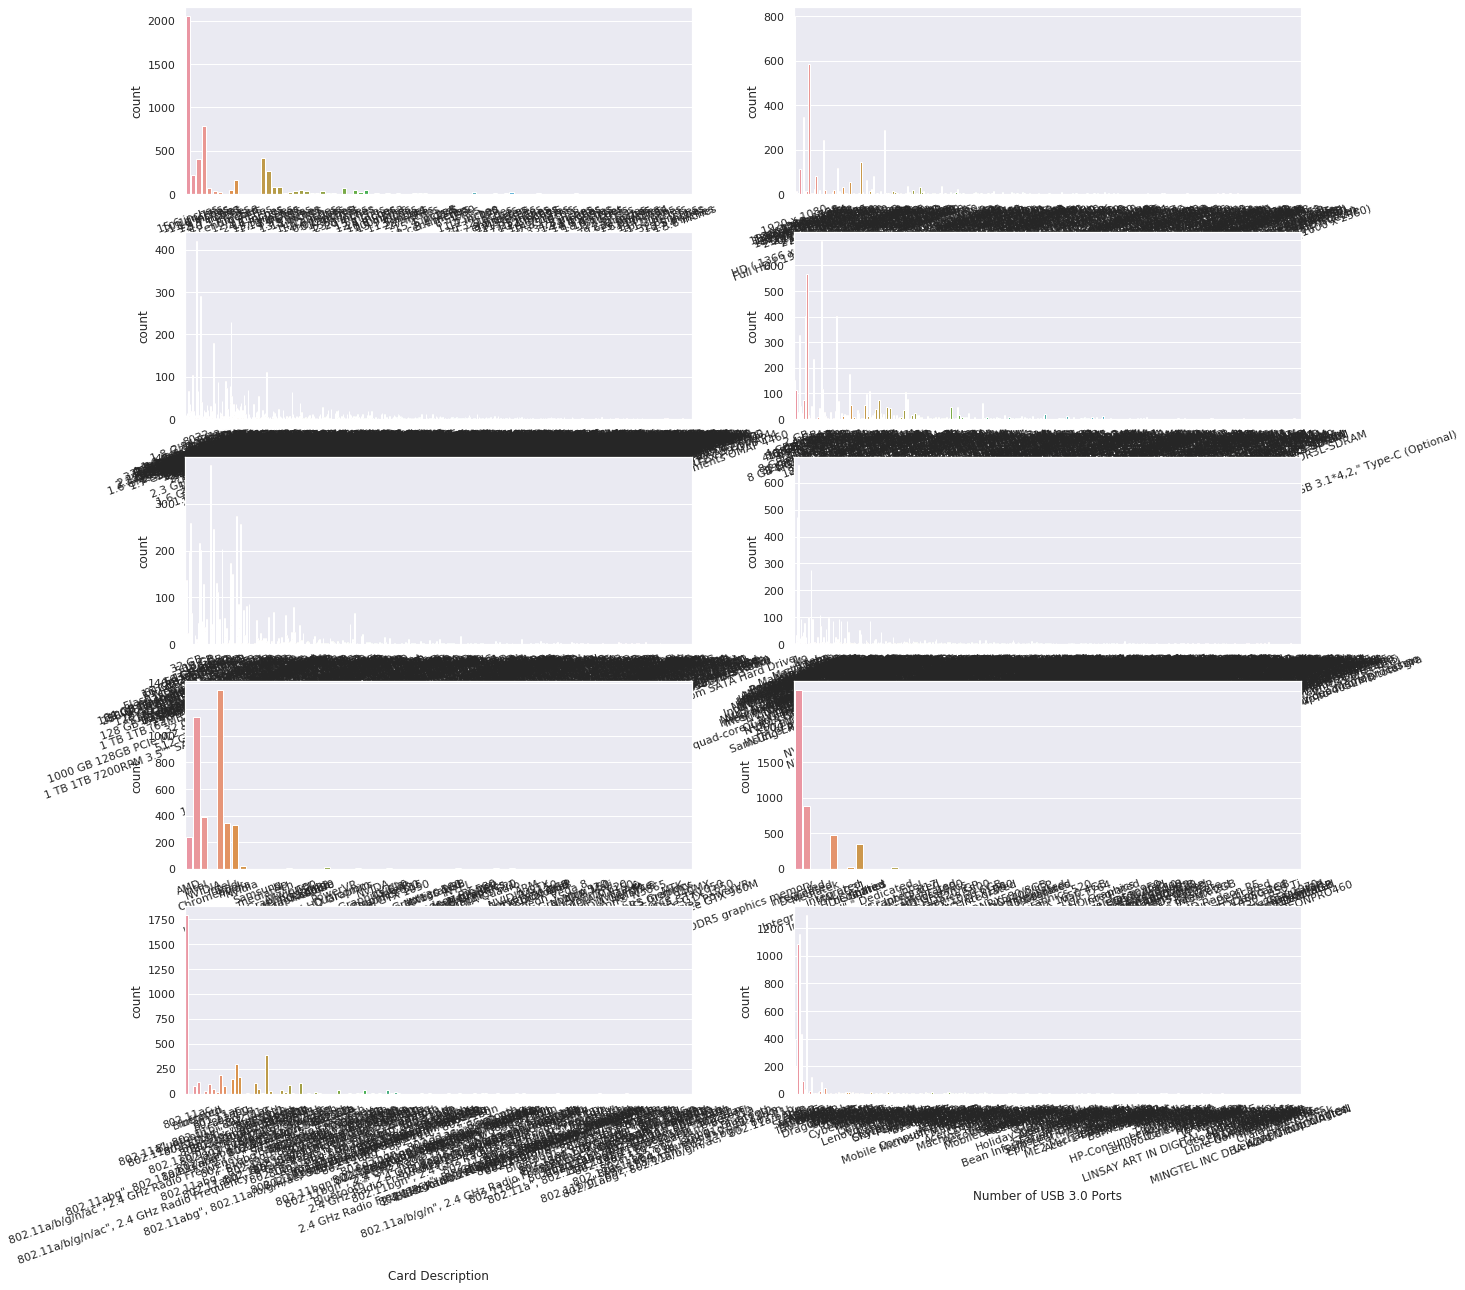

In [8]:
# Univariate Analysis
# EDA with Categorical Variables

fig,ax = plt.subplots(5,2, figsize=(20,20))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

In [13]:
# EDA with Numerical Variables
# df[numerical].hist(bins=50,figsize=(16,20),layout=(8,3))